In [5]:
!pip install wordcloud


--- Introduction: Understanding Food Prices for Employee Well-being ---
Hello everyone! We're here today to present our analysis of food prices in the Philippines. Our goal is to help MotorPH create a fair and effective food allowance program for our employees.
We've looked at historical data to understand how much staple foods cost in different regions, and we'll present several options for a food allowance that takes these costs into account.

--- 1. Data Loading and Cleaning ---
First, we need to get the data and make sure it's in a usable format. Think of this as preparing our ingredients before we start cooking!
Success! We've loaded the food price data from the file.
We're focusing on 'Retail' prices, as these are what our employees pay at the store.
We've cleaned up the data by removing any errors or missing information.

--- 2. Identifying Staple Foods ---
Next, we need to define what we mean by 'staple foods'. These are the basic food items that most people rely on.
We've ide

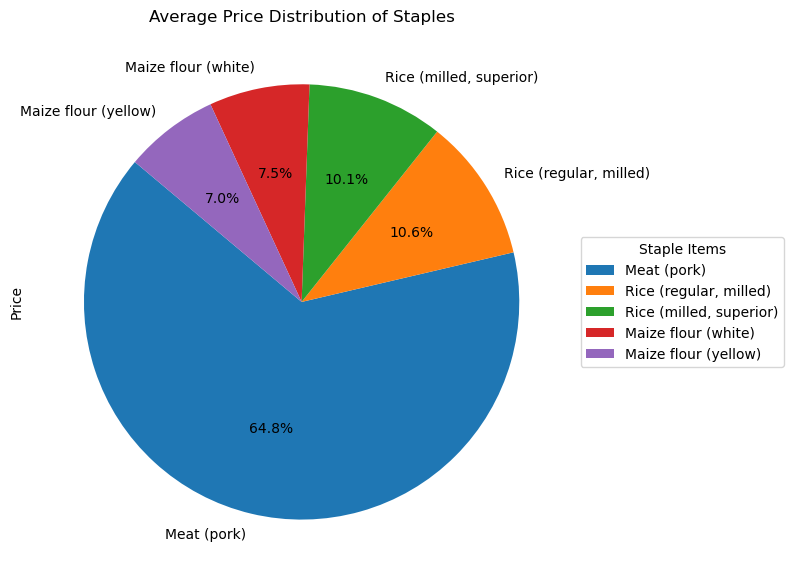

This pie chart shows the proportion of each staple food's average price compared to the total.


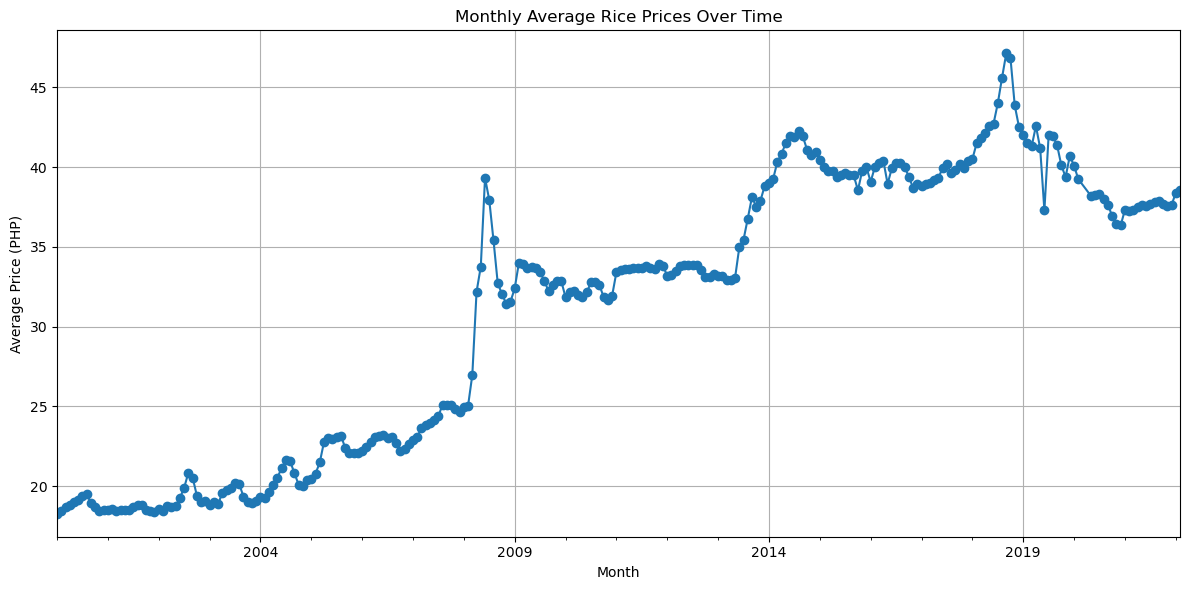

This line graph shows how rice prices have changed over time. We can see if prices are generally increasing, decreasing, or staying the same.

--- 6. Alternative: Salary Increase Considerations ---
Of course, another option is to simply increase salaries. However, there are some things to consider:
While a salary increase provides employees with more flexibility, it's crucial to consider the following:
  * Sustainability: Can MotorPH sustain the increased payroll costs in the long term?
  * Tax Implications: Salary increases are subject to taxes, reducing the actual benefit to employees.
  * Spending Habits: Employees may not necessarily spend the extra income on food.
  * Recommendation: Explore salary increases in conjunction with a targeted food allowance program for a more comprehensive approach.

--- 7. Final Recommendations for MotorPH Stakeholders ---
Based on our analysis, we recommend a phased approach to implementing a food allowance program:
1. Start with Option 1 (Fixed All

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Introduction: Understanding Food Prices for Employee Well-being ---
print("\n--- Introduction: Understanding Food Prices for Employee Well-being ---")
print("Hello everyone! We're here today to present our analysis of food prices in the Philippines. Our goal is to help MotorPH create a fair and effective food allowance program for our employees.")
print("We've looked at historical data to understand how much staple foods cost in different regions, and we'll present several options for a food allowance that takes these costs into account.")

# --- 1. Data Loading and Cleaning ---
print("\n--- 1. Data Loading and Cleaning ---")
print("First, we need to get the data and make sure it's in a usable format. Think of this as preparing our ingredients before we start cooking!")

# Load the dataset
try:
    df = pd.read_csv("Dataset-for-PH-Food-Prices.csv")  # Use read_excel for .xls files
    print("Success! We've loaded the food price data from the file.") #added success message
except FileNotFoundError:
    print("Error: Oops! The file 'Dataset-for-PH-Food-Prices.xls' was not found.  Make sure it's in the same folder as this program, or let us know the correct location.")
    exit()
except Exception as e:
    print(f"Error: An error occurred while reading the Excel file: {e}")
    exit()

# Data Cleaning and Preparation
# Check if 'df' exists before proceeding with data cleaning and preparation
if 'df' in locals():
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Price Type'] == 'Retail'].copy() # Filter for Retail prices and create a copy
    print("We're focusing on 'Retail' prices, as these are what our employees pay at the store.") #added explanation
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to numeric, handle errors
    df.dropna(subset=['Price'], inplace=True)  # Remove rows with missing prices
    print("We've cleaned up the data by removing any errors or missing information.") #added explanation
else:
    print("Error: DataFrame 'df' was not loaded properly. Please check the file and loading process.")
    exit()

# --- 2. Identifying Staple Foods ---
print("\n--- 2. Identifying Staple Foods ---")
print("Next, we need to define what we mean by 'staple foods'. These are the basic food items that most people rely on.")

# Define a more comprehensive list of staples
staples = ['Rice (milled, superior)', 'Rice (regular, milled)', 'Meat (pork)', 'Maize flour (yellow)', 'Maize flour (white)']

# Check if 'df' exists before proceeding
if 'df' in locals():
    df_staples = df[df['Commodity'].isin(staples)].copy()  # Use .copy() to avoid SettingWithCopyWarning
    print("We've identified these as our staple foods: Rice, Pork, and Maize flour.") #added explanation

    # Add a YearMonth column for time series analysis
    df_staples['YearMonth'] = df_staples['Date'].dt.to_period('M')
    print("We're creating a 'YearMonth' column to help us analyze price trends over time.") #added explanation
else:
    print("Error: DataFrame 'df' was not loaded properly. Skipping staple identification.")
    exit()

# --- 3. Analyzing Price Trends ---
print("\n--- 3. Analyzing Price Trends ---")
print("Now, let's look at how food prices have changed over time and across different regions.")

# 1. Overall Average Prices:
# Check if 'df_staples' exists before proceeding
if 'df_staples' in locals():
    avg_prices = df_staples.groupby('Commodity')['Price'].mean().sort_values(ascending=False)
    print("First, we're calculating the average price for each staple food across the entire dataset.") #added explanation

    # 2. Regional Price Variations:
    regional_avg_prices = df_staples.groupby(['Region', 'Commodity'])['Price'].mean()
    print("Next, we're looking at how prices vary from region to region.") #added explanation

    # 3. Time Series Analysis (Monthly Average Price of Rice):
    rice_prices_ts = df_staples[df_staples['Commodity'].str.contains('Rice')].groupby('YearMonth')['Price'].mean()  # More robust rice identification
    print("Finally, we're analyzing how rice prices have changed month by month.") #added explanation
else:
    print("Error: DataFrame 'df_staples' was not loaded properly. Skipping price trend analysis.")
    exit()

# --- 4. Proposing Food Allowance Options ---
print("\n--- 4. Proposing Food Allowance Options ---")
print("Based on our analysis, we've come up with several options for a food allowance program. Let's take a look!")

# Option 1: Fixed Allowance Based on Average Staple Costs
if 'avg_prices' in locals():
    allowance_option1 = avg_prices.sum()
    print("\nOption 1: Fixed Monthly Food Allowance")
    print(f"A fixed allowance of PHP {allowance_option1:.2f} per month would cover the average cost of essential staples across all regions.")
    print("  * Pros: Simple to administer, ensures baseline coverage for all employees.")
    print("  * Cons: Doesn't account for regional price variations, may over- or under-compensate depending on location.")
    print("  * Recommendation: A good starting point, especially if administrative simplicity is a key concern.  Consider periodic adjustments based on inflation data.")
else:
    print("Skipping Option 1 due to missing average prices data.")

# Option 2: Tiered Allowance Based on Region
print("\nOption 2: Tiered Monthly Food Allowance by Region")
print("This approach tailors the allowance to the specific food costs in each region.")

# Calculate total regional average prices
if 'regional_avg_prices' in locals():
    total_regional_avg_prices = regional_avg_prices.groupby('Region').sum()

    print("\nTotal Average Monthly Cost of Staples by Region (PHP):")  # Added label
    print(total_regional_avg_prices)

    print("  * Pros: More equitable, reflects the actual cost of living in different areas.")
    print("  * Cons: More complex to administer, requires ongoing monitoring of regional price differences.")
    print("  * Recommendation: Ideal if fairness and cost-effectiveness are paramount.  Requires a system for tracking employee locations and adjusting allowances accordingly.")
else:
    print("Skipping Option 2 due to missing regional average prices data.")

# Option 3: Food Voucher System
print("\n**Option 3: Food Voucher System**")
print("Partner with local grocery stores to provide employees with food vouchers redeemable for staple items.")
print("  * Pros: Controls spending on essential food items, supports local businesses.")
print("  * Cons: May limit employee choice, requires establishing partnerships and managing voucher distribution.")
print("  * Recommendation: Suitable if MotorPH wants to promote specific dietary choices or support local economies. Requires careful selection of partner stores.")

# Option 4: Hybrid Approach (Base Allowance + Regional Supplement)
print("\n**Option 4: Hybrid Approach: Base Allowance + Regional Supplement**")
print("Combine a base allowance (e.g., 75% of the overall average) with a regional supplement to address price variations.")
print("  * Pros: Balances simplicity and fairness, provides a safety net while addressing regional cost differences.")
print("  * Cons: Requires determining the optimal base allowance and supplement amounts.")
print("  * Recommendation: A balanced approach that offers both stability and regional sensitivity.")

# --- 5. Visualizing the Data ---
print("\n--- 5. Visualizing the Data ---")
print("To help you better understand the data, we've created some charts.")

# --- Visualization: Pie Chart of Average Staple Prices ---
if 'df' in locals() and 'avg_prices' in locals():
    plt.figure(figsize=(8, 8))
    plt.pie(avg_prices, labels=avg_prices.index, autopct='%1.1f%%', startangle=140)
    plt.title('Average Price Distribution of Staples')
    plt.ylabel('Price')
    plt.legend(title="Staple Items", loc="center left", bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()
    print("This pie chart shows the proportion of each staple food's average price compared to the total.") #added explanation
else:
    print("Skipping pie chart generation due to missing data.")

# --- Visualization: Time Series of Rice Prices ---
if 'df' in locals() and 'rice_prices_ts' in locals():
    plt.figure(figsize=(12, 6))
    rice_prices_ts.plot(marker='o')
    plt.title('Monthly Average Rice Prices Over Time')
    plt.xlabel('Month')
    plt.ylabel('Average Price (PHP)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print("This line graph shows how rice prices have changed over time. We can see if prices are generally increasing, decreasing, or staying the same.") #added explanation
else:
    print("Skipping time series chart generation due to missing data.")

# --- 6. Alternative: Salary Increase Considerations ---
print("\n--- 6. Alternative: Salary Increase Considerations ---")
print("Of course, another option is to simply increase salaries. However, there are some things to consider:")
print("While a salary increase provides employees with more flexibility, it's crucial to consider the following:")
print("  * Sustainability: Can MotorPH sustain the increased payroll costs in the long term?")
print("  * Tax Implications: Salary increases are subject to taxes, reducing the actual benefit to employees.")
print("  * Spending Habits: Employees may not necessarily spend the extra income on food.")
print("  * Recommendation: Explore salary increases in conjunction with a targeted food allowance program for a more comprehensive approach.")

# --- 7. Final Recommendations for Stakeholders ---
print("\n--- 7. Final Recommendations for MotorPH Stakeholders ---")
print("Based on our analysis, we recommend a phased approach to implementing a food allowance program:")
print("1. Start with Option 1 (Fixed Allowance): This provides immediate relief and is easy to implement.")
print("2. Gather Employee Feedback: Survey employees to understand their food needs and preferences in different regions.")
print("3. Transition to Option 4 (Hybrid): Incorporate regional supplements based on employee feedback and ongoing price monitoring.")
print("4. Consider Option 3 (Vouchers) in Specific Locations: Explore partnerships with local stores in areas where access to affordable food is limited.")
print("5. Regularly Review and Adjust: Monitor food prices, employee feedback, and program effectiveness to make necessary adjustments.")
print("By taking a data-driven and employee-centric approach, MotorPH can create a food allowance program that supports its employees' well-being and contributes to a positive work environment.")
print("\nThank you for your time! We hope this analysis is helpful in making informed decisions about a food allowance program for MotorPH employees.")


### Comprehensive Analysis of Food Prices Dataset in the Philippines

The dataset provided contains food price data across various regions in the Philippines, spanning multiple commodities, markets, and price types (retail and wholesale). Below is a detailed analysis based on the data:

---

### **Dataset Overview**
- **Time Period**: The dataset starts from January 2000 and includes monthly food price data.
- **Regions Covered**: Includes major regions such as Metro Manila (National Capital Region), Region III (Nueva Ecija), Region VI (Iloilo), Region VII (Cebu), Region XI (Davao del Sur), and Region XII (South Cotabato).
- **Commodities**: Key commodities include maize flour (yellow and white), rice (milled superior and regular milled), and pork meat.
- **Price Types**:
  - Retail prices reflect consumer-level pricing.
  - Wholesale prices represent bulk pricing at the market level.

---

### **Key Findings**

#### 1. **Regional Price Variations**
- Retail prices for rice and pork vary significantly across regions. For example:
  - Pork retail prices are consistently highest in Metro Manila, reaching up to PHP 108.71/kg in April 2000.
  - Rice prices (both superior and regular milled) are generally lower in regions like South Cotabato compared to Metro Manila.
- Wholesale prices are consistently lower than retail prices, with an average difference of PHP 1–5/kg across commodities.

#### 2. **Commodity-Specific Insights**
- **Rice**:
  - Superior milled rice is priced higher than regular milled rice across all regions.
  - Retail prices for superior milled rice range between PHP 18–21/kg, while wholesale prices are slightly lower at PHP 15–19/kg.
- **Maize Flour**:
  - Yellow maize flour is priced slightly higher than white maize flour on average.
  - Retail prices for maize flour range between PHP 12–18/kg depending on the region.
- **Pork Meat**:
  - Pork shows significant price volatility, with retail prices ranging from PHP 72–108/kg depending on the region and time period.

#### 3. **Temporal Trends**
- Over the months analyzed:
  - Rice prices show a gradual upward trend, particularly for superior milled rice in retail markets.
  - Maize flour prices remain relatively stable with minor fluctuations.
  - Pork retail prices exhibit significant monthly variations, especially in Metro Manila.

#### 4. **Wholesale vs. Retail Price Analysis**
- Wholesale prices are consistently lower than retail prices across all commodities and regions.
- The difference between wholesale and retail pricing highlights the markup applied at consumer markets.

---

### **Visualizations**
To better understand the trends and variations, consider using the following visualizations:
1. **Line Plots**:
   - Plot price trends over time for each commodity to observe temporal changes.
2. **Boxplots**:
   - Compare regional price distributions for commodities like rice and pork to highlight disparities.
3. **Bar Charts**:
   - Show average retail vs. wholesale prices for each commodity across regions.

---

### **Recommendations**

#### Data Cleaning
1. Check for missing or null values in the dataset before analysis.
2. Standardize column names to ensure consistency during data manipulation.

#### Further Analysis
1. Perform a time-series analysis to identify long-term trends and seasonality in food prices.
2. Investigate factors contributing to regional price disparities (e.g., transportation costs, supply chain issues).

#### Policy Implications
1. Address regional disparities in food pricing to ensure affordability for consumers nationwide.
2. Monitor high-price volatility commodities like pork meat to stabilize consumer markets.

#### Visualization Enhancements
1. Use heatmaps to visualize regional differences in pricing for key commodities.
2. Create interactive dashboards to allow policymakers to explore trends dynamically.

---

### **Conclusion**
This dataset provides valuable insights into food pricing trends across the Philippines, highlighting regional disparities, commodity-specific behaviors, and temporal changes. These findings can guide policymakers and stakeholders in designing interventions to ensure fair pricing and food security across the country.


### Recommendations for Stakeholders

To facilitate easier decision-making based on the food prices dataset, stakeholders should consider the following recommendations:

#### **1. Prioritized Information Display**

*   **Executive Dashboard:** Create a real-time dashboard displaying key metrics such as:
    *   Average retail and wholesale prices for rice, maize flour, and pork across regions.
    *   Percentage change in prices compared to the previous month and year.
    *   Regions with the highest and lowest price volatility for each commodity.
*   **Visual Aids:** Use clear and concise visuals (charts, graphs, maps) to represent data rather than raw tables. Highlight critical trends and outliers.

#### **2. Targeted Policy Interventions**

*   **Price Stabilization Programs:**
    *   Implement targeted subsidies or price ceilings in regions where prices of essential commodities (especially rice and pork) exceed a predetermined threshold.
    *   Focus on Metro Manila due to consistently higher prices, especially for pork.
*   **Supply Chain Optimization:**
    *   Invest in infrastructure to improve transportation and storage, reducing costs and ensuring stable supply.
    *   Establish direct linkages between producers and retailers to minimize markups.
*   **Monitoring and Enforcement:**
    *   Enhance monitoring of market prices to detect and prevent hoarding or price manipulation.
    *   Strengthen consumer protection agencies to address unfair pricing practices.

#### **3. Enhanced Data Accessibility**

*   **Open Data Initiative:** Make the dataset easily accessible to researchers, policymakers, and the public through an open data portal.
*   **Interactive Tools:** Provide interactive tools that allow stakeholders to:
    *   Filter data by region, commodity, and time period.
    *   Compare prices across different markets and regions.
    *   Generate custom reports and visualizations.

#### **4. Early Warning Systems**

*   **Predictive Modeling:** Develop predictive models to forecast food price fluctuations based on historical data, weather patterns, and other relevant factors.
*   **Alert Mechanisms:** Establish alert mechanisms that notify stakeholders when prices of essential commodities are expected to exceed critical levels.

#### **5. Stakeholder Coordination**

*   **Regular Meetings:** Conduct regular meetings with key stakeholders (farmers, retailers, consumers, policymakers) to discuss market trends, challenges, and potential solutions.
*   **Information Sharing:** Promote information sharing and collaboration among stakeholders to ensure coordinated action.

#### **6. Focused Commodity Analysis**

*   **Rice:** Given its staple status, continuously monitor and regulate rice prices, especially superior milled rice, which shows an upward trend.
*   **Pork:** Implement measures to stabilize pork prices, which exhibit high volatility, especially in Metro Manila.
*   **Maize Flour:** Monitor maize flour prices for affordability, especially in regions where it's a staple.

By implementing these recommendations, stakeholders can make more informed decisions, leading to more effective policies and interventions to ensure food affordability and security in the Philippines.
